In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.dpi'] = 100

%load_ext autoreload
%autoreload 2

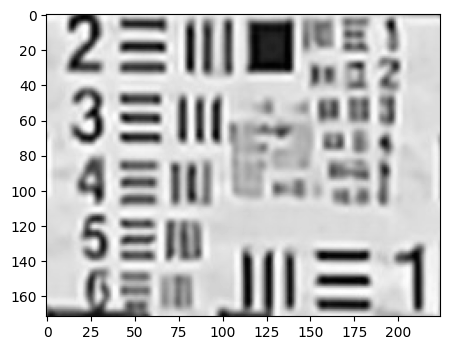

In [38]:
img = cv2.imread("./images/DSCF0017.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[2167:2339, 3672:3896]
img.shape
plt.imshow(img, cmap=plt.get_cmap('gray') ,vmin=0,vmax=255)


Text(0.5, 0, 'lp/cm')

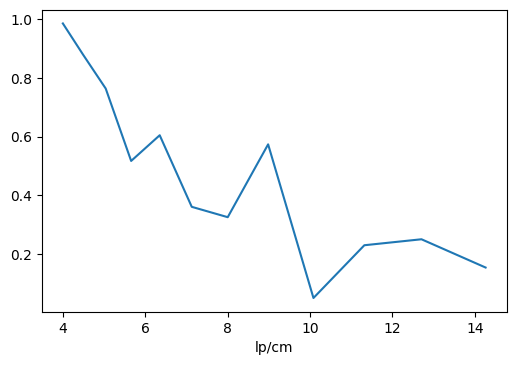

In [58]:
img_cpy = img.copy()

bar_dims = [
    (138, 165, 160, 175), # 1
    (5, 30, 45, 55),
    (47, 70, 45, 55),
    (85, 105, 45, 55),
    (120, 137, 45, 55),
    (145, 165, 45, 55),
    (5, 20, 175, 180), #2
    (27, 43, 175, 180),
    (50, 60, 175, 180),
    (65, 77, 175, 180),
    (83, 93, 177, 180),
    (100, 108, 177, 180)
]

contrasts = []

for dim in bar_dims:
    img_cpy[dim[0]:dim[1], dim[2]:dim[3]] = 175
    img_sec = img[dim[0]:dim[1], dim[2]:dim[3]]
    img_sec = np.array(img_sec, dtype='int64')
    bar_max = np.mean(np.max(img_sec, axis=0))
    bar_min = np.mean(np.min(img_sec, axis=0))

    contrast_p = (bar_max - bar_min) / (bar_max + bar_min)
    contrasts.append(contrast_p)

lp_cm = [4]

for _ in range(len(contrasts)-1):
    lp_cm.append(lp_cm[-1] * 1.1225)

# plt.imshow(img_cpy, cmap=plt.get_cmap('gray') ,vmin=0,vmax=255)

plt.plot(lp_cm, contrasts)
plt.xlabel("lp/cm")